In [16]:
import pandas as pd
import sklearn as sk
import fairlearn

In [17]:
import seaborn as sns
import bokeh

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%matplotlib inline
adult = fetch_openml(data_id=1590, as_frame=True)
X = pd.get_dummies(adult.data)
y_true = (adult.target == '>50K') * 1
sex = adult.data['sex']
sex.value_counts()
df = adult.data

In [19]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [20]:
t = pd.get_dummies(adult.data)

In [21]:
df = pd.melt(t, value_vars=t.columns).rename(columns={'variable': 'column_name',
                                                                        'value': 'column_value'})

# insert data to fct_model_data
df.loc[:, 'model_id'] = 1
df.loc[:, 'is_target_variable'] = 0
df.loc[:, 'is_donated'] = 0

In [22]:
df = pd.melt(t.reset_index(), value_vars=t.columns, id_vars='index').rename(columns={'variable': 'column_name',
                                                                        'value': 'column_value'})

In [23]:
df.columns

Index(['index', 'column_name', 'column_value'], dtype='object')

In [24]:
target = pd.DataFrame(adult.target).rename(columns={'class': 'column_value'})
target['column_value'] = np.where(target['column_value'] == '<=50K', 0, 1)
target.loc[:, 'model_id'] = 1
target.loc[:, 'column_name'] = 'income'
target.loc[:, 'is_target_variable'] = 1
target.loc[:, 'is_donated'] = 0
target.loc[:, 'index'] = target.index

insert_df = df.append(target)

In [25]:
insert_df

,index,column_name,column_value,model_id,is_target_variable,is_donated
0,0,age,25.0,NaN,NaN,NaN
1,1,age,38.0,NaN,NaN,NaN
2,2,age,28.0,NaN,NaN,NaN
3,3,age,44.0,NaN,NaN,NaN
4,4,age,18.0,NaN,NaN,NaN
...,...,...,...,...,...,...
48837,48837,income,0.0,1.0,1.0,0.0
48838,48838,income,1.0,1.0,1.0,0.0
48839,48839,income,0.0,1.0,1.0,0.0
48840,48840,income,0.0,1.0,1.0,0.0


In [26]:
pivot = pd.pivot_table(insert_df, columns="column_name", values="column_value", index='index')

In [27]:
from sklearn import ensemble

In [28]:
rfc = sk.ensemble.RandomForestClassifier()

In [29]:
rfc.fit(pivot.drop('income', 1), pivot['income'])

RandomForestClassifier()

In [30]:
rfc.score(pivot.drop('income', 1), pivot['income'])

0.9998362065435485

In [31]:
pivot['income']

index
0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
48837    0.0
48838    1.0
48839    0.0
48840    0.0
48841    1.0
Name: income, Length: 48842, dtype: float64

In [32]:
df = pd.concat([pd.get_dummies(adult.data), pd.get_dummies(adult.target)], axis=1).rename(columns={'>50K': 'over_50k'})
df = df.drop('<=50K', axis=1)
df = df.reset_index()

In [97]:
df = pd.concat([pd.get_dummies(adult.data), pd.get_dummies(adult.target)], axis=1).rename(columns={'>50K': 'over_50k'})
df = df.drop('<=50K', axis=1)

In [98]:

def create_age_hist_plot(df):
    hist = np.histogram(df['age'], 100)

    df_hist = pd.DataFrame(hist, index=['counts', 'age']).T
    df_hist = df_hist[df_hist['counts'] != 0]

    ax = sns.relplot(
        data=df_hist, kind="line",
        x="age", y="counts"
    )
    max_val = 1.03 * df_hist['counts'].max()
    # todo: this must be inserted data, don't use "25" here
    ax = plt.vlines(25, df_hist['counts'].min(), max_val, colors='red')
    #url = "/static/new_plot.png"
    #plt.savefig(f'templates/{url}')
    #return url

In [161]:
def create_histogramm(df, column, bins=100, rotate=True, round_xticks=True):
    hist = np.histogram(df[column], bins)

    df_hist = pd.DataFrame(hist, index=['counts', column]).T
    df_hist = df_hist[df_hist['counts'] != 0]

    ax = sns.barplot(
        data=df_hist,
        x=column, y="counts", orient='v'
    )
    if round_xticks:
        ax.set_xticklabels([int(x) for x in df_hist[column].values])
    if rotate:
        for item in ax.get_xticklabels():
            item.set_rotation(45)
    return ax
    # todo: this must be inserted data, don't use "25" here
    # ax = plt.vlines(25, df_hist['counts'].min(), max_val, colors='red')

In [110]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-not-inc,workclass_Self-emp-inc,workclass_Federal-gov,...,native-country_Nicaragua,native-country_Scotland,native-country_Thailand,native-country_Yugoslavia,native-country_El-Salvador,native-country_Trinadad&Tobago,native-country_Peru,native-country_Hong,native-country_Holand-Netherlands,over_50k
0,25.0,226802.0,7.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44.0,160323.0,10.0,7688.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18.0,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='age', ylabel='counts'>

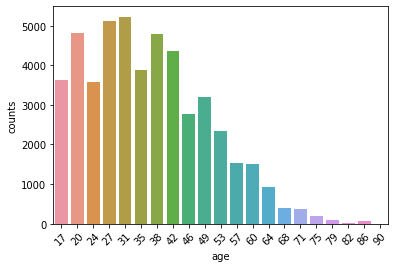

In [162]:
create_histogramm(df, 'age', 20)

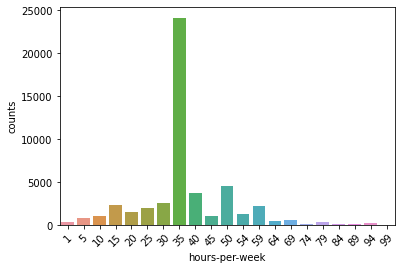

In [163]:
ax = create_histogramm(df, 'hours-per-week', 20)

In [153]:
ax.set_xticklabels()

array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
       54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ])

In [100]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-not-inc,workclass_Self-emp-inc,workclass_Federal-gov,...,native-country_Nicaragua,native-country_Scotland,native-country_Thailand,native-country_Yugoslavia,native-country_El-Salvador,native-country_Trinadad&Tobago,native-country_Peru,native-country_Hong,native-country_Holand-Netherlands,over_50k
0,25.0,226802.0,7.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44.0,160323.0,10.0,7688.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18.0,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48838,40.0,154374.0,9.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48839,58.0,151910.0,9.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22.0,201490.0,9.0,0.0,0.0,20.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


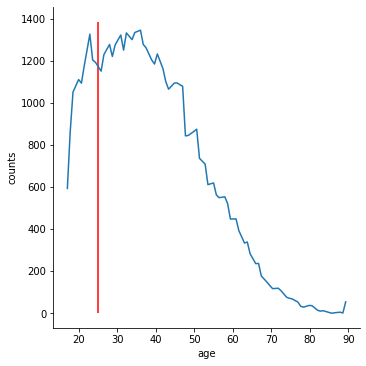

In [99]:
create_age_hist_plot(df)